In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
class Adaline(object):
    def __init__(self, eta = 0.01, n_iter = 50):
        self.eta = eta
        self.n_iter = n_iter
        
    def output(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.output(X) > 0, 1, -1)
    
    def fit(self, X, y):
        self.w_ = np.random.normal(size = X.shape[1]+1)
        for _ in range(self.n_iter):
            out = self.output(X)
            update = self.eta*(y-out)
            self.w_[1:] += np.dot(update, X)/len(update)
            self.w_[0] += np.mean(update)
            errors = np.sum(update**2)
        print(self.w_)
        return self

In [3]:
df = pd.read_csv("./Datasets/iris.data", index_col=None, header=None)
df.columns = ['x1', 'x2', 'x3', 'x4', 'y']
df = df.iloc[50:150]
df['y'] = df['y'].apply(lambda x: 0 if x == 'Iris-versicolor' else 1)
df.tail()

,x1,x2,x3,x4,y
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1
149,5.9,3.0,5.1,1.8,1


In [4]:
X = df[['x2', 'x3']].values.astype(np.float32)
y = df['y'].values.astype(np.int32)

np.random.seed(123)
shuffle_idx = np.random.permutation(y.size)

X, y = X[shuffle_idx], y[shuffle_idx]

percent70 = int(len(shuffle_idx) * 0.7)

X_train, X_test = X[:percent70], X[percent70:]
y_train, y_test = y[:percent70], y[percent70:]

mu, sigma = X_train.mean(axis=0), X_train.std(axis=0)
X_train = (X_train - mu) / sigma
X_test = (X_test - mu) / sigma

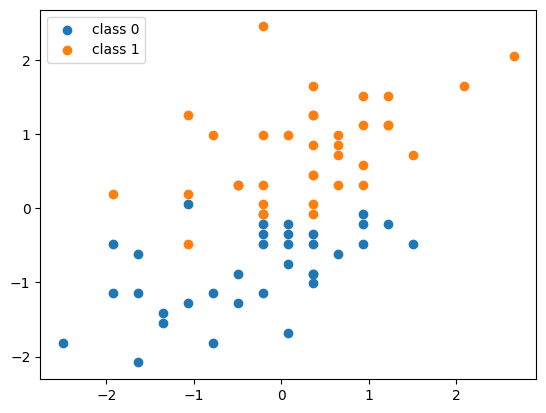

In [5]:
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label = "class 0")
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label = "class 1")
plt.legend()
plt.show()

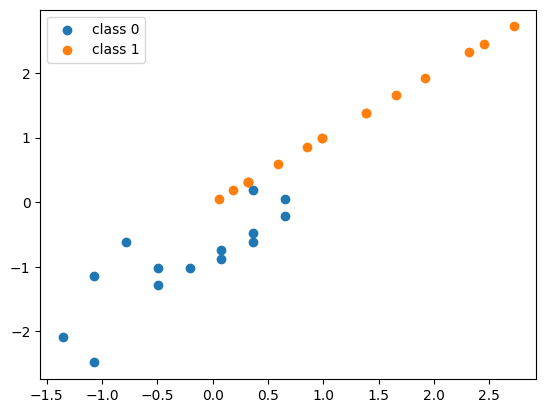

In [6]:
plt.scatter(X_test[y_test == 0, 0], X_test[y_test==0, 1], label = 'class 0')
plt.scatter(X_test[y_test == 1, 1], X_test[y_test == 1, 1], label = 'class 1')
plt.legend()
plt.show()

In [7]:
print(X_train.shape[1])

2


In [8]:
ada = Adaline()
kq = ada.fit(X_train, y_train)

[ 0.4752631  -0.66978374  1.01916364]


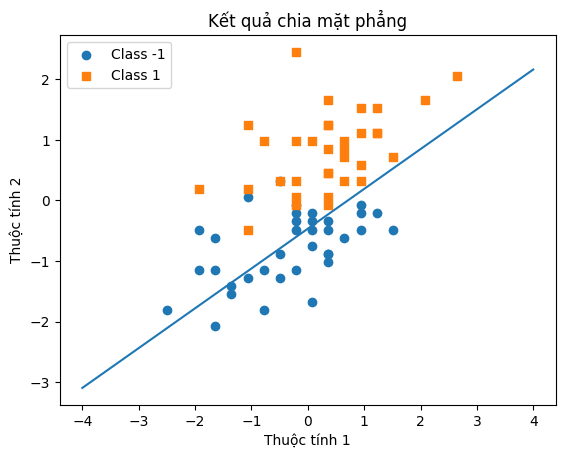

In [9]:
x_min = -4
y_min = (-(kq.w_[1] * x_min) - kq.w_[0]) / kq.w_[2]

x_max = 4
y_max = (-(kq.w_[1] * x_max) - kq.w_[0]) / kq.w_[2]

plt.plot([x_min, x_max], [y_min, y_max])
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label="Class -1", marker="o")
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label="Class 1", marker="s")
plt.title("Kết quả chia mặt phẳng")
plt.xlabel("Thuộc tính 1")
plt.ylabel("Thuộc tính 2")
plt.legend()
plt.show()